# 1 {-}

**(This problem is related to exercise 4.1 in chapter 2 of the book Stochastic Simulation by Asmussen and Glynn). The } is used as a lifetime distribution by life insurance companies. To explain the distribution, let $X(t)$ be a Poisson process with rate $\lambda(t) = a + be^{ct}$ where $a = 5 \cdot 10^{−4}$, $b = 7.5858 \cdot 10^{−5}$, $c = \log(1.09144)$. If a person is, say, 45 years old, then the first jump time of $X(t)$ after $t = 45$ is used as a model for the person’s age when they die.**

# a {-}

**As a warm-up, write a function that samples the jump times of a Poisson process with constant rate $\lambda$ that occur prior to some specified time $t$.**


In [1]:
import numpy as np

In [2]:
def PPhomogenous(l, T):
    """ Simulates a homogenous poisson process 
    Args:
        l: poisson process rate
        T: maximum time
    Returns: 
        jump_times: list
    """
    interjump_times = []
    while sum(interjump_times) <= T:
        interjump_times.append(np.random.exponential(1/l))
    
    if sum(interjump_times) > T:
        interjump_times.pop(-1)
    
    jump_times = np.cumsum(interjump_times)
    return jump_times
    

# b {-}

**Write a sampler that generates the Poisson process $X(t)$ up to $t = 100$. Use the accept-reject algorithm that we talked about in class based on a constant rate Poisson process. Show that the accept-reject algorithm is valid. (Hint: to show the validity of the accept-reject algorithm show that it will sample a Poisson process with a jump in $[t, t + \Delta t]$ with probability approximately $\lambda(t)\Delta t$).**

In [3]:
def lambda_t(t):
    a = 5*10**-4
    b = 7.5858*10**-5
    c = np.log(1.09144)
    return(a+b*np.exp(c*t))

In [4]:
lambda_t(40)/lambda_t(100)

0.006286281465700793

We first need to find the maximum of our function $\lambda(t)$ on $[0,100]$. Since $\lambda(t)$ is strictly increasing the maximum occurs at $t=100$. We can visualize this.

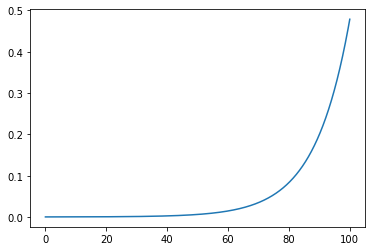

In [5]:
import matplotlib.pyplot as plt
x = np.arange(0,100,0.01)
y = lambda_t(x)
plt.plot(x, y)
plt.show()

In [6]:
def PPnonhomogenous(T=100):
    """Simulates the poisson process for question 1 using 
    the accept-reject algorithm
    Returns: 
        samples: list, a realization of the poisson process
    
    """
    samples = []
    constant_rate = lambda_t(T)
    jump_times = PPhomogenous(constant_rate, T)
    for jump_time in jump_times:
        p = lambda_t(jump_time)/constant_rate
        if np.random.uniform(0,1) < p:
            samples.append(jump_time)
    return samples 

In [7]:
# generate samples
samples = PPnonhomogenous()

In [8]:
samples

[87.98977860579181,
 91.04474939285772,
 93.07038009740425,
 93.40732691000584,
 98.19416665628628]

Assume our non-homogenous poisson process $\{ X(t): t\in R_{\ge 0}\}$ specified above with rate $\lambda(t)$. By definition, we know that the probability an event or jump occurs in the timeframe $[t, t+\Delta t]$is $\lambda(t)\Delta t.$

To show the validity of the accept-reject algorithm we want to be able to show that indeed $P(\text{event} \in [t, t+\Delta t])=\lambda(t)\Delta t.$

Let $\bar{\lambda}=\max_{t\le 100}\lambda(t)$ (which in the context of this problem we have established to occur at $t=100$ so $\bar{\lambda}=\lambda(100))$.

And so, the 
$$P(\text{event} \in [t, t+\Delta t])$$
$$=P(\{\text{accepting the event}\}\cap \{\text{event} \in [t, t+\Delta t]~\text{with constant rate}~\lambda(100)\})$$
$$=P(\text{accepting the event}|\text{event} \in [t, t+\Delta t]~\text{with constant rate}~\lambda(100)\})P(\text{event} \in [t, t+\Delta t]~\text{with constant rate}~\lambda(100)\})$$
$$=(\frac{\lambda(t)}{\bar{\lambda}})\bar{\lambda}\Delta t$$
$$=\lambda(t)\Delta t$$

The second to last equality follows from:

- The probability an event or jump occurs in the timeframe $[t, t+\Delta t]$ is $\bar{\lambda}\Delta t$ for a poisson process with rate $\bar{\lambda}$

- By definition of the accept-reject algorithm, we accept an event from the defined time homogenous poisson process with rate $\bar{\lambda}$ with $P(U<\frac{\lambda(t)}{\bar{\lambda}})=\frac{\lambda(t)}{\bar{\lambda}}$  where $U \sim \text{Uniform}[0,1]$

# c {-}

**Derive a formula for the cdf of the age upon death of a 60 year old. (Don’t just quote the result I presented in class, derive it yourself. Use the idea of splitting up time into small time intervals and taking a limit as those intervals go to 0 in size.)**

Assume our non-homogenous poisson process $\{ X(t): t\in R_{\ge 0}\}$ specified above with rate $\lambda(t)$. By definition, we know that the probability an event or jump occurs in the timeframe $[t, t+\Delta t]$ is $\lambda(t)\Delta t.$

Let $T_k$ denote the time of the $k$th event or jump.

Then to derive the formula for the cdf of the age upon death of a $60$ year old we want $P(T_{i}-60 \le x)$ with $T_i$ being the time of the next event (in the context of the problem, age of death).

Let's start with $P(T_{i}-60 > x)=P(T_{i}> 60+x).$

Break the interval $[60, 60+x]$ into partitions of size $\Delta t$. 

Since we are assuming a poisson process we know that $P(\text{event} \in [60+(j-1)\Delta t,60+j\Delta t]) = \lambda(60+j\Delta t)\Delta t$. 

The total number of such partitions is $j=\frac{x-60}{\Delta t}$. 

And so,

$$P(T_{i}-60 > x)=P(T_{i}> 60+x)\approx \prod_{j=1}^{\frac{x-60}{\Delta t}}(1-P(\text{event} \in [60+(j-1)\Delta t,60+j\Delta t]))$$

$$\approx \prod_{j=1}^{\frac{x-60}{\Delta t}}(1-\lambda(60+j\Delta t)\Delta t)$$

$$\implies$$

$$P(T_{i}-60 > x)=P(T_{i}> 60+x)=\lim_{\Delta t \to 0}\prod_{j=1}^{\frac{x-60}{\Delta t}}(1-\lambda(60+j\Delta t)\Delta t)$$

$$=\lim_{\Delta t \to 0}e^{\log(\prod_{j=1}^{\frac{x-60}{\Delta t}}(1-\lambda(60+j\Delta t)\Delta t)}$$

$$=\lim_{\Delta t \to 0}e^{\sum_{j=1}^{\frac{x-60}{\Delta t}}\log(1-\lambda(60+j\Delta t)\Delta t)}$$

$$=\lim_{\Delta t \to 0}e^{-\sum_{j=1}^{\frac{x-60}{\Delta t}}\lambda(60+j\Delta t)\Delta t}~\text{because of Taylor Series by noticing}~\Delta t~\text{is small}$$

Now by considering the riemann sum  $\sum_{j=1}^{\frac{x-60}{\Delta t}}\lambda(60+j\Delta t)\Delta t$ where the function is $\lambda(t)$ and the interval and partition length are $[60, 60+x]$ and $\Delta t$, respectively, we have that the limit of this riemann sum is the definite integral $\int_{60}^{60+x}\lambda(s)ds$.

So,

$$\lim_{\Delta t \to 0}e^{-\sum_{j=1}^{\frac{x-60}{\Delta t}}\lambda(60+j\Delta t)\Delta t}$$

$$=e^{-\int_{60}^{60+x}\lambda(s)ds}$$

So $P(T_{i}-60 > x)=P(T_{i}> 60+x)=e^{-\int_{60}^{60+x}\lambda(s)ds} \implies P(T_{i}-60 \le x)=P(T_{i} \le 60+x)=1-e^{-\int_{60}^{60+x}\lambda(s)ds}=1-e^{\int_{60}^{60+x}(a + be^{cs})ds}$ where $a = 5 \cdot 10^{−4}$, $b = 7.5858 \cdot 10^{−5}$, $c = \log(1.09144)$.




# d {-}

**Compute the probability a 60 year old lives to be 90 in two ways:**

**i. Use your languages integrate function to evaluate the formula for this probability based on your cdf in (c).**

**ii. Use a Monte Carlo integration approach and your sampler from (b).**

**i. Use your languages integrate function to evaluate the formula for this probability based on your cdf in (c).**

We want $P(T_{i}> 90)=P(T_{i}> 60+30)=e^{\int_{60}^{60+30}\lambda(s)ds}=e^{\int_{60}^{90}(a + be^{cs})ds}$ where $a = 5 \cdot 10^{−4}$, $b = 7.5858 \cdot 10^{−5}$, $c = \log(1.09144)$

In [9]:
from scipy.integrate import quad

ans, error = quad(lambda_t, 60, 90)
np.exp(-ans)

0.11882500940011224

So the probability a $60$ year old lives to be $90$ is approximately $0.1188$.

**ii. Use a Monte Carlo integration approach and your sampler from (b).**

We want $P(T_i>90).$ So let $H$ be an indicator random variable,
$$H=\begin{cases} 
      1 & \text{}~T_i>90 \\
      0 & \text{otherwise} 
   \end{cases}
$$

Then $E[H]=P(T_i>90)$ and we can use a Monte Carlo approach: Invoking the law of large numbers, we can approximate $E[H]$ with $\frac{1}{N}\sum^{N}_{i=1}\mathbb{1}_{T_i>90}$ for an appropriate $N$ simulations.

In [10]:
N = 10**5
samples = [PPnonhomogenous() for _ in range(0,N)]

Now, let's filter. We want the first element of each of our samples from the list called "samples" to be the age at death. So we need to filter -- get rid of those elements $\le 60$.

In [11]:
samples = [[age for age in s if age > 60] for s in samples]

In [12]:
ages_of_death = [s[0] for s in samples if len(s)>0]

In [13]:
np.sum([1 if age>90 else 0 for age in ages_of_death])/len(ages_of_death)

0.1158661575562701

So the probability a $60$ year old lives to be $90$ is approximately $0.1158$, very close to what we got in part i.

# 2 {-}

**Consider a Poisson process with rate $\lambda(t) = 1/t$. Notice that $\lambda(t)$ is unbounded. Calculate the pdf of the first jump time.**

Assume our non-homogenous poisson process $\{ X(t): t\in R_{\ge 0}\}$ specified above with rate $\lambda(t)$. By definition, we know that the probability an event or jump occurs in the timeframe $[t, t+\Delta t]$ is $\lambda(t)\Delta t.$

Let $T_k$ denote the time of the $k$th event or jump.

Then to derive the formula of the pdf let us start with the cdf of the first jump/event time: $P(T_{1}\le x)$.

Let's start with $P(T_{1} > x).$

Break the interval $[0, x]$ into partitions of size $\Delta t$. 

Since we are assuming a poisson process we know that $P(\text{event} \in [(j-1)\Delta t,j\Delta t]) = \lambda(j\Delta t)\Delta t$. 

The total number of such partitions is $j=\frac{x}{\Delta t}$. 

And so,

$$P(T_{1} > x)\approx \prod_{j=1}^{\frac{x}{\Delta t}}(1-P(\text{event} \in [(j-1)\Delta t,j\Delta t]))$$

$$\approx \prod_{j=1}^{\frac{x}{\Delta t}}(1-\lambda(j\Delta t)\Delta t)$$

$$\implies$$

$$P(T_{1} > x)=\lim_{\Delta t \to 0}\prod_{j=1}^{\frac{x}{\Delta t}}(1-\lambda(j\Delta t)\Delta t)$$

$$=\lim_{\Delta t \to 0}e^{\log(\prod_{j=1}^{\frac{x}{\Delta t}}(1-\lambda(j\Delta t)\Delta t)}$$

$$=\lim_{\Delta t \to 0}e^{\sum_{j=1}^{\frac{x}{\Delta t}}\log(1-\lambda(j\Delta t)\Delta t)}$$

$$=\lim_{\Delta t \to 0}e^{-\sum_{j=1}^{\frac{x}{\Delta t}}\lambda(j\Delta t)\Delta t}~\text{because of Taylor Series by noticing}~\Delta t~\text{is small}$$

We cannot consider riemann integration because $\lambda(t)$ is not bounded. However, 




# 3 {-}

# a {-}

**Redo problem 4b of homework 4, but this time use a Gibbs sampler to sample from $Y$ rather than a Metropolis-Hastings sampler.**

**4.b. Let $Y$ be the r.v. on $\Omega$ defined by $P(Y = w) = \alpha(f(w))^2$, where $\alpha$ is a normalizing constant that makes the probabilities sum to $1$ and for $w \in \Omega$ let $f(w)$ be the number of positions with a $1$ in the grid. Use your sampler to generate a histogram for $f(Y)/100^2$.**

Let's consider the distribution we want to sample from $P(Y=w)$ and suppose that we have chosen some initial state for the Markov Chain $\omega_0$. At each step of the Gibbs Sampling procedure $n+1$: We sample $\omega_{n+1}$ by randomly choosing an entry $i \in \{1,2,\ldots, 100^2\}$ of $\omega_n$ and replacing the value of the variable $\omega_{(n+1)i}$ by a value drawn from the distribution of that variable conditioned on the remaining variables. I.e., we replace $\omega_{(n+1)i}$ by a value drawn from the distribution,

$$p(\omega_{ni}|\omega_{nj}, j \ne i)=\begin{cases} 
      \frac{f(\omega_n)}{f(\omega_n)+f(\omega'_n)} & \text{if}~\omega_n \\
      \frac{f(\omega'_n)}{f(\omega_n)+f(\omega'_n)} & \text{if}~\omega'_n 
   \end{cases}$$
   
where $\omega'_n$ has $\omega'_{ni}=1-\omega_{ni}$.

In [14]:
import numpy as np
n = 100
N = 10**6
omega_start = np.zeros((n, n))

In [15]:
def gs_y(n, omega):
    """Function that returns a sample of the Y model
    using Gibbs Sampling
    
    Args:
        omega: matrix of size (n, n)
        n: size of omega
        
    Returns:
        omega: matrix of size (n, n)

    """
    i, j = np.random.randint(0, n, 2)
    change = 1 - omega[i, j]
    p1 = omega.sum()**2
    p2 = (omega.sum()+change)**2
    choice = np.random.choice([1, 2], p=[p1/(p1+p2), p2/(p1+p2)])
            
    if choice == 2:
        omega[i, j] = 1 - omega[i, j]
        return omega
    
    return omega

In [16]:
def MCMC_y(N, omega, n=100):
    """MCMC using Gibbs Sampling for Y model
    
    Args:
        N: integer representing length of chain
        omega: matrix of size (n, n)
    
    Returns:
        n_ones: list of length N 
        omega: matrix of size (n, n)

    """
    n_ones = []
    for _ in range(N):
        n_ones.append(omega.sum()/n**2)
        omega = gs_y(n, omega)
    return n_ones, omega

In [17]:
n_ones, omega = MCMC_y(N, omega_start)

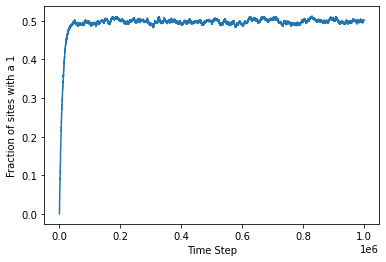

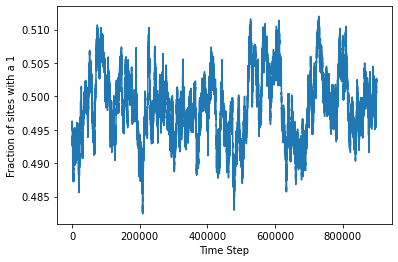

In [18]:
plt.plot(n_ones)
plt.xlabel("Time Step")
plt.ylabel("Fraction of sites with a 1")
plt.show()

plt.plot(n_ones[100000:])
plt.xlabel("Time Step")
plt.ylabel("Fraction of sites with a 1")
plt.show()

Hence, running for $N=10^6$ seems good enough. Let's try another starting point to be sure and then, sample $w$ and visualize it:

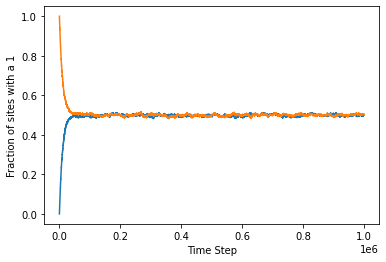

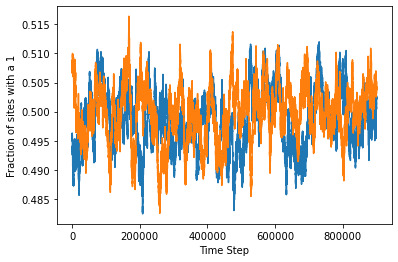

In [19]:
omega_start = np.ones((n, n))
n_onesv2, _ = MCMC_y(N, omega_start)

plt.plot(n_ones)
plt.plot(n_onesv2)
plt.xlabel("Time Step")
plt.ylabel("Fraction of sites with a 1")
plt.show()

# burn-in of 100000 time steps
plt.plot(n_ones[100000:])
plt.plot(n_onesv2[100000:])
plt.xlabel("Time Step")
plt.ylabel("Fraction of sites with a 1")
plt.show()

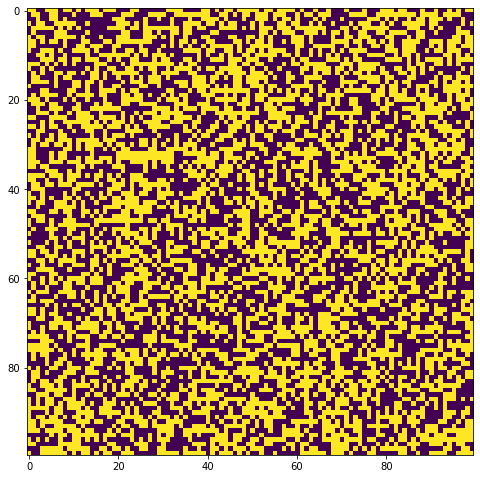

In [20]:
# taking into account burn-in
samples = n_ones[100000:]
plt.figure(figsize=(8,10))
plt.imshow(omega)
plt.show()

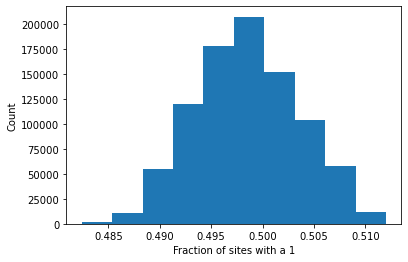

In [21]:
plt.hist(samples)
plt.xlabel("Fraction of sites with a 1")
plt.ylabel("Count")
plt.show()

We get a very similar result to using a Metripolis-Hastings Sampler (HW 4) -- with the mean sample approximately $0.5.$

In [22]:
np.mean(samples)

0.49846601288888903

# b {-}

**Explain why you cannot use a Gibbs sampler based on switching a single coordinate (i.e. die role) to sample die rolls for problem 2 of homework 6.**

If you only switch one coordinate (re-roll one die), once you reach a $w$ in your desired sample space you will never move from there. And so Gibbs sampling is not useful in this case as you will not be able to reach different samples in your desired sample space.

This is easy to show if you consider marginal distributions. Let $w_t \in \Omega= \{X \in R^{100}: X_i \in {1,2,3,4,5,6}~\text{and}~\sum_{i=1}^{100}X_i=450\}$

Then suppose you randomly choose a die $i$ from out of $100$ possible and $X_i=x$ for $x \in \{1,2,3,4,5,6\}$.
The marginal distribution of $X_{i+1}$ given the values of all the other die rolls $X_j, j \ne i$ is going to be $x$ with probability $1$ as it is the only number that will get you to the sum of $450$ and consequently to a $w_{t+1} \in \Omega.$ 

# c {-}

**Construct a Gibbs sampler to sample die rolls for problem 2 of homework 6 by choosing two dice, computing their marginal distribution given all other die rolls, and sampling from the marginal to produce the Markov chain update. Such a sampler is not a Gibbs sampler in the sense that it considers one coordinate at a time, but it is a Gibbs sampler in the sense that it uses marginal distributions to update the chain.**

**Suppose we roll 100 dice and the sum of the die rolls is 450. Use an MCMC approach to determine** 

**(i) the expected number of 6’s rolled**

**(ii) the expected number of 1’s rolled and**

**(iii) the probability that we roll less than thirty 1’s.** 

**Do all of these using a single run of a Markov chain. Be sure to include a burn-in time and run your chain for a sufficient length of time.**

Once you randomly choose $2$ die possible sum of both is $S=\{2,3,4,5,6,7,8,9,10,11,12\}$. Let's create a lookup table with pairs that sum to $x$ for $x\in S$. Note that this lookup table represents the marginal distribution.

In [107]:
import pandas as pd
lookup_table = {2: [(1,1)], 
        3: [(1,2), (2,1)],
        4: [(1,3), (3,1), (2,2)],
        5: [(1,4), (4,1), (2,3), (3,2)],
        6: [(1,5), (5,1), (3,3), (4,2), (2,4)],
        7: [(6,1), (1,6), (4,3), (3,4), (2,5), (5,2)],
        8: [(2,6), (6,2), (3,5), (5,3), (4,4)],
        9: [(3,6), (6,3), (4,5), (5,4)],
        10: [(5,5), (4,6), (6,4)],
        11: [(5,6), (6,5)],
        12: [(6,6)]}

In [108]:
def MCMCDiceRoll(w, N):
    """Returns samples generated via Markov Chain Monte Carlo (MCMC)
    using Gibbs Sampling
    
    Args:
        w: A matrix of shape (100, )
        N: scalar representing the run time length of the markov chain
        
    Returns:
        samples: A list (length N) of the MCMC samples (each sample 100 dimensional)
    
    """
    samples = [w]
    for _ in range(N):
        die1, die2 = np.random.choice(np.arange(100), 2)
        s = w[die1] + w[die2]
        # sampling from the marginal distribution
        pair_choice = np.random.choice(range(0,len(lookup_table[s])))
        w[die1], w[die2] = lookup_table[s][pair_choice] 
        wprime = w.copy()
        samples.append(wprime)
   
    return samples

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# initializing with w in Omega
X0 = np.concatenate((np.repeat(6, 70), np.repeat(1, 30)))
samples = MCMCDiceRoll(X0, 10**6)

(i) the expected number of 6’s rolled

From our samples list let's find the number of 6's in each sample.

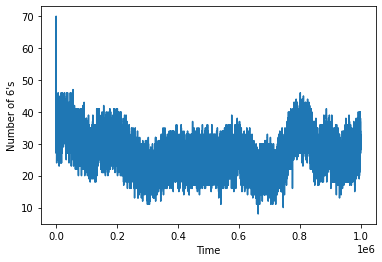

In [127]:
sixes = [(w==6).sum() for w in samples]

plt.plot(sixes)
plt.ylabel("Number of 6's")
plt.xlabel("Time")
plt.show()

From the above plot we can see that running the chain for 1 million iterations is good enough as it looks like convergence is happening. Further, we can test the convergence (whether our chain has reached its stationary distribution) by running the chain again with another starting value. 

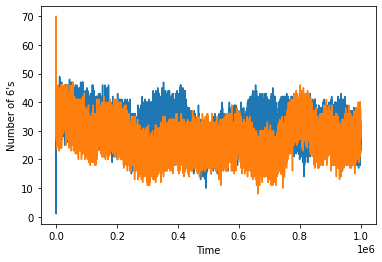

In [135]:
X0_2 = np.concatenate((np.repeat(5, 50), np.repeat(4, 50)))
samples2 = MCMCDiceRoll(X0_2, 10**6)
sixes2 = [(w==6).sum() for w in samples2]
plt.plot(sixes2)
plt.plot(sixes)
plt.ylabel("Number of 6's")
plt.xlabel("Time")
plt.show()

From the above it looks like our chain has reached the stationary distribution. Let's use as burn in the first $500,000$ samples. 

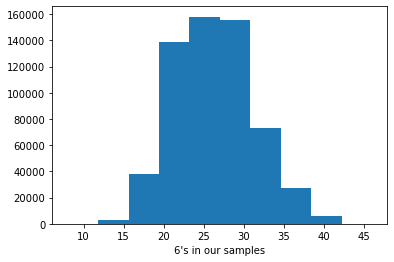

In [145]:
sixes_h = sixes[500000:]

plt.hist(sixes_h)
plt.xlabel("6's in our samples")
plt.show()

And so the expected number of 6's:

In [147]:
np.mean(sixes_h)

29.1672897211838

This is similar to what we got in HW 6: $34.657058585858586$.

(ii) the expected number of 1’s rolled

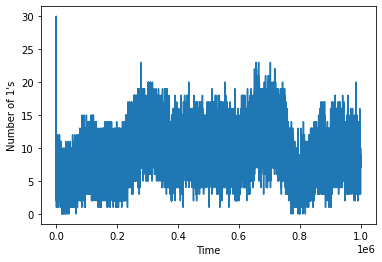

In [161]:
ones = [(w==1).sum() for w in samples]
plt.plot(ones)
plt.ylabel("Number of 1's")
plt.xlabel("Time")
plt.show()

From the above plot we can see that running the chain for 1 million iterations is good enough as it looks like convergence is happening. Further, we can test the convergence (whether our chain has reached its stationary distribution) by running the chain again with another starting value. 

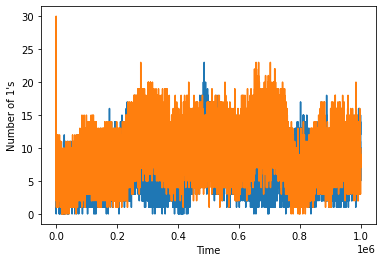

In [162]:
ones2 = [(w==1).sum() for w in samples2]
plt.plot(ones2)
plt.plot(ones)
plt.ylabel("Number of 1's")
plt.xlabel("Time")
plt.show()

From the above it looks like our chain has reached the stationary distribution. Let's use as burn in the first $500,000$ samples. 

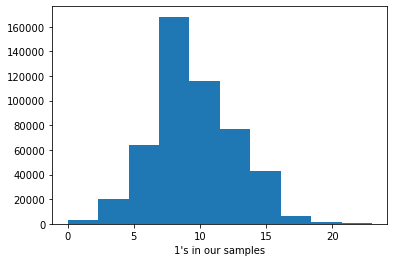

In [163]:
ones = ones[500000:]
plt.hist(ones)
plt.xlabel("1's in our samples")
plt.show()


And so the expected number of 1's:

In [164]:
np.mean(ones)

8.483303033393932

Again close to the results from the previous HW: 5.3631373737373735. However, ideally, If I ran for more iterations (more than 1 million) I might get better results. 

(iii) the probability that we roll less than thirty 1’s

In [165]:
p = [int((w==1).sum()<30) for w in samples[200000:]]
np.mean(p)

1.0

Same result as the previous HW, which makes sense given our distribution of 1's.